In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

#this step is necessary because we are using the already splot data inside the pycaret setup, and indexes must not overlap on the train and test data sets

# #combine balanced train data back into a single df
# X_train['subscribed'] = y_train
# train_data = X_train

# #combine test data back into a single df
# X_test['subscribed'] = y_test
# test_data = X_test.set_index( np.arange(len(X_train), len(X_train)+len(X_test)))

# X=train_data.drop(labels=['subscribed'], axis=1)
# y=train_data['subscribed']

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51190 entries, 0 to 51189
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            51190 non-null  float64
 1   job_blue-collar                51190 non-null  float64
 2   job_services                   51190 non-null  float64
 3   job_entrepreneur               51190 non-null  float64
 4   job_admin.                     51190 non-null  float64
 5   job_management                 51190 non-null  float64
 6   job_technician                 51190 non-null  float64
 7   job_housemaid                  51190 non-null  float64
 8   job_unemployed                 51190 non-null  float64
 9   job_retired                    51190 non-null  float64
 10  job_student                    51190 non-null  float64
 11  job_self-employed              51190 non-null  float64
 12  marital_married                51190 non-null 

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

#Define the model
def nn_model():
    model = Sequential()
    model.add(Dense(53, input_shape=(53,), activation='relu')) #Input layer
    model.add(Dense(34, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #Output layer

    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Declare parameteres

# param_grid = {
#     'batch_size': [16,32,64],
#     'epochs': [5,10,15]
# }

# grid_search = GridSearchCV(
#     estimator=KerasClassifier(build_fn=nn_model),
#     param_grid=param_grid,
#     cv=10
# )

#result = grid_search.fit(X_train,y_train)
#Optimize parameteres

#Fit the model
model = nn_model()
model.fit(X_train, y_train,batch_size = 16, epochs = 15)


Epoch 1/15
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4938 - accuracy: 0.7592
Epoch 2/15
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4675 - accuracy: 0.7744
Epoch 3/15
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4538 - accuracy: 0.7845
Epoch 4/15
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4430 - accuracy: 0.7927
Epoch 5/15
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4341 - accuracy: 0.7987
Epoch 6/15
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4272 - accuracy: 0.8039
Epoch 7/15
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4203 - accuracy: 0.8093
Epoch 8/15
3200/3200 [==============================] - 4s 1ms/step - loss: 0.4136 - accuracy: 0.8134
Epoch 9/15
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4078 - accuracy: 0.8155
Epoch 10/15
3200/3200 [==============================] - 5s 1ms/step - loss: 0.402

In [ ]:
#grid_search.best_estimator_

In [38]:
# evaluate the model
model.evaluate(X_test, y_test,batch_size=128)


97/97 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8389


[0.4057924747467041, 0.838863730430603]

In [39]:
predicts = model.predict(X_test)
predicts

evaluate_data = X_test.copy()
evaluate_data['subscribed'] = y_test
evaluate_data['prediction_score'] = predicts
evaluate_data['prediction_label'] = np.where(evaluate_data.prediction_score > 0.5, 1, 0)
evaluate_data

387/387 [==============================] - 1s 2ms/step


,age,job_blue-collar,job_services,job_entrepreneur,job_admin.,job_management,job_technician,job_housemaid,job_unemployed,job_retired,...,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed,prediction_score,prediction_label
0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,4.0,0.0,0,0.417480,0
1,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0.676210,1
2,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,3.0,2.0,2.0,0,0.448413,0
3,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,4.0,1.0,3.0,0,0.113868,0
4,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,2.0,3.0,3.0,0,0.118062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12351,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0,0.474217,0
12352,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0.551872,1
12353,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,3.0,0,0.073518,0
12354,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.416808,0


In [ ]:
#save the nn model
model.save('classifier_nn')



In [5]:
reloaded_model = tf.keras.models.load_model('classifier_nn')

predictions = reloaded_model.predict(X_train)

print(
    "This particular client had a %.1f percent probability "
    "of subscribing to a term deposit, as evaluated by our model." % (150 * predictions[0][0],)
)



1600/1600 [==============================] - 2s 1ms/step
This particular client had a 14.5 percent probability of subscribing to a term deposit, as evaluated by our model.


In [ ]:
#SHAP
import shap

background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]

e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:5])

# plot the feature attributions
shap.beeswarm(shap_values)

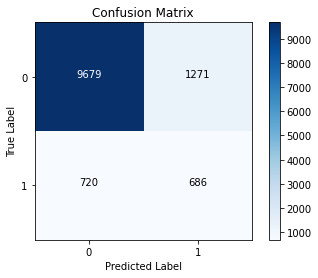

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_true = evaluate_data['subscribed']
y_pred = evaluate_data['prediction_label']
cm = confusion_matrix(y_true, y_pred)

# disp.plot()

# plt.show()

# cm

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, np.unique(y_true))
plt.yticks(tick_marks, np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()



In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     10950
           1       0.35      0.49      0.41      1406

    accuracy                           0.84     12356
   macro avg       0.64      0.69      0.66     12356
weighted avg       0.86      0.84      0.85     12356



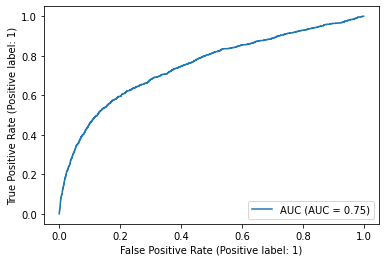

In [42]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
roc_auc_score(y_test, predicts)

RocCurveDisplay.from_predictions(y_true, predicts,name='AUC',drop_intermediate=True)

# plt.show()

In [43]:
#Kappa metric for test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_true,y_pred)

0.3175950698005534

In [18]:
#Train data reeults
train_predicts = model.predict(X_train)
train_predicts

train_evaluate = X_train.copy()
train_evaluate['subscribed'] = y_train
train_evaluate['prediction_score'] = train_predicts
train_evaluate['prediction_label'] = np.where(train_evaluate.prediction_score > 0.5, 1, 0)
train_evaluate



1600/1600 [==============================] - 2s 1ms/step


,age,job_blue-collar,job_services,job_entrepreneur,job_admin.,job_management,job_technician,job_housemaid,job_unemployed,job_retired,...,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,subscribed,prediction_score,prediction_label
0,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,3.0,2.0,2.0,0,0.203141,0
1,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,0.258497,0
2,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0,0.560083,1
3,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,3.0,0,0.080184,0
4,32.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,2.0,1.0,3.0,0,0.122404,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51185,34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0.901181,1
51186,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1,0.958678,1
51187,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,3.0,4.0,1.0,3.0,1,0.163112,0
51188,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1,0.982856,1


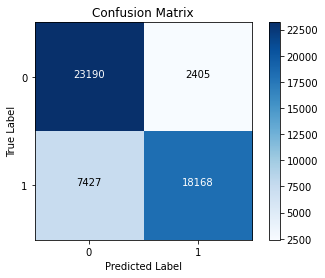

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_train_true = train_evaluate['subscribed']
y_train_pred = train_evaluate['prediction_label']
cm = confusion_matrix(y_train_true, y_train_pred)

# disp.plot()

# plt.show()

# cm

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_true)))
plt.xticks(tick_marks, np.unique(y_true))
plt.yticks(tick_marks, np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with values
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Show the plot
plt.show()


In [20]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83     25595
           1       0.88      0.71      0.79     25595

    accuracy                           0.81     51190
   macro avg       0.82      0.81      0.81     51190
weighted avg       0.82      0.81      0.81     51190



In [21]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
roc_auc_score(y_train, train_predicts)

#RocCurveDisplay.from_predictions(y_true, y_pred)

# plt.show()

0.9018345139918809

In [22]:
cohen_kappa_score(y_train_true,y_train_pred)

0.615862473139285

In [ ]:
#youden j = 0.39
